In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.datasets import load_iris
data = load_iris()


In [3]:
X = data.data
y = data.target
X_names = data.feature_names
y_names = data.target_names

In [6]:
X_names
y_names
X.shape, y.shape

((150, 4), (150,))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of X_test {X_test.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of X_train (120, 4)
Shape of y_train (120,)
Shape of X_test (30, 4)
Shape of y_test (30,)


In [26]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
y_preds = cart.predict(X_test)
print(accuracy_score(y_test, y_preds) * 100)

100.0


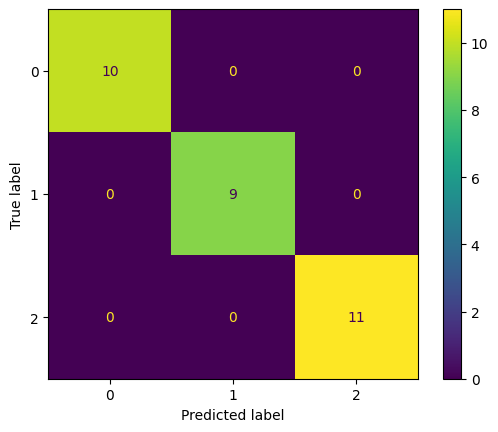

In [27]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.savefig("CFM.png")

In [28]:
cr = classification_report(y_test, y_preds)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)
print(accuracy_score(y_test, y_preds) * 100)

100.0


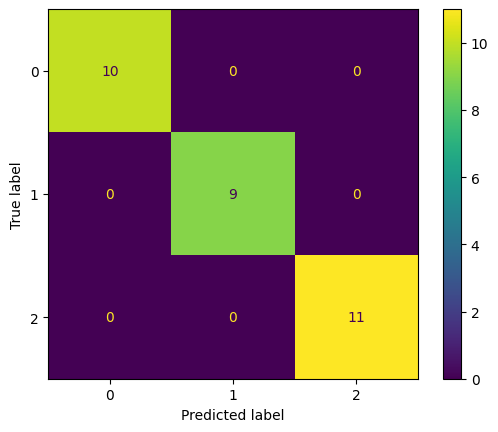

In [31]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()

In [32]:
svm = SVC(gamma = "auto")
svm.fit(X_train, y_train)
y_preds = svm.predict(X_test)
print(accuracy_score(y_test, y_preds) * 100)

100.0


In [33]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(accuracy_score(y_test, y_preds) * 100)

100.0


In [34]:
# Artificial neural network
mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 150),
                    max_iter=300,
                    activation="relu",
                    solver="adam",
                    random_state=42)
mlp.fit(X_train, y_train)
y_preds = mlp.predict(X_test)
print(accuracy_score(y_test, y_preds) * 100)

100.0


In [42]:
dict = {
    0: "Iris-Setosa ho hai",
    1: "Iris-Veriscolor ho hai",
    2: "Iris-Virginica ho hai"
}

In [43]:
answer = mlp.predict([[6.1, 2.8, 4.7, 1.2]])
print(dict[answer[0]])

Iris-Veriscolor ho hai
